# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import chromedriver_autoinstaller
chromedriver_autoinstaller.install()

'/Users/katiedjahan/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/chromedriver_autoinstaller/113/chromedriver'

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

In [5]:
# Create a Beautiful Soup Object
html = browser.html
table_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = table_soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

In [7]:
# Create an empty list
table_rows = []
# Loop through the scraped data to create a list of rows
for row in table:
    row_data = row.find_all('td')
    row_data = [r.text.strip() for r in row_data]
    table_rows.append(row_data)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_rows)
df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

In [10]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype('int64')
df['ls']=df['ls'].astype('int64')
df['month']=df['month'].astype('int64')
df['min_temp']=df['min_temp'].astype('float64')
df['pressure']=df['pressure'].astype('float64')

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

In [13]:
# 1. How many months are there on Mars?
df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?
df['sol'].nunique()

1867

In [15]:
# 3. What is the average low temperature by month?
avg_low_temp = df.groupby("month")["min_temp"].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

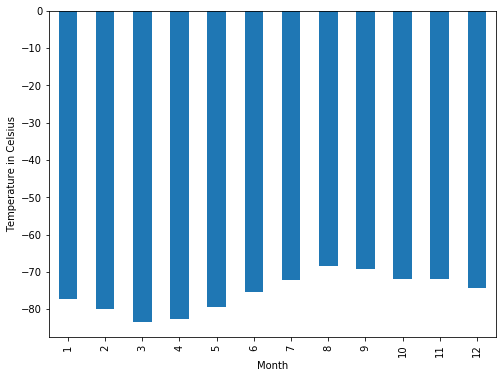

In [16]:
# Plot the average temperature by month
temp_plot = avg_low_temp.plot(kind="bar",figsize=(8,6))
temp_plot.set_xlabel("Month")
temp_plot.set_ylabel("Temperature in Celsius")
plt.show()

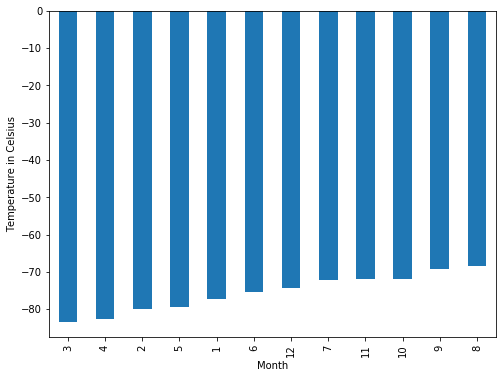

In [17]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_sorted = avg_low_temp.sort_values()

temp_plot_sorted = avg_low_temp_sorted.plot(kind="bar",figsize=(8,6))
temp_plot_sorted.set_xlabel("Month")
temp_plot_sorted.set_ylabel("Temperature in Celsius")
plt.show()

On average, the third month has the lowest temperature and the eighth month has the highest temperature.

In [18]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby("month")["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

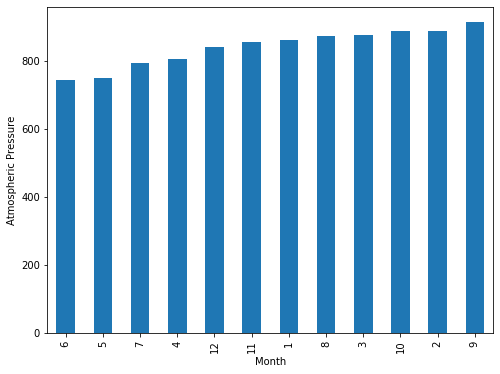

In [19]:
# Plot the average pressure by month
avg_pressure_sorted = avg_pressure.sort_values()

pressure_plot_sorted = avg_pressure_sorted.plot(kind="bar",figsize=(8,6))
pressure_plot_sorted.set_xlabel("Month")
pressure_plot_sorted.set_ylabel("Atmospheric Pressure")
plt.show()

On average, the sixth month has the lowest atmospheric pressure and the ninth month has the highest atmospheric pressure.

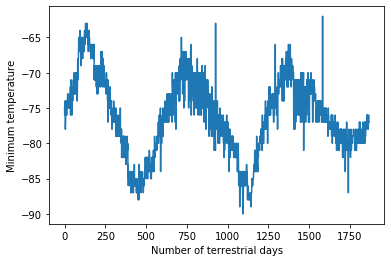

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df['min_temp'])
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.show()

There are peaks at roughly 1425 and 750 terrestrial days, and lows at roughly 1100 and 450 terrestrial days. 1475-750=675 and 1100-450=650. If we use this data to estimate how long a year on Mars is compared to Earth days, we can estimate that a Mars year is roughly 662.5 Earth days.

### Step 6: Save the Data

In [21]:
# Write the data to a CSV
df.to_csv("output_data/mars_temperature.csv")

In [22]:
browser.quit()